In [1]:
#This jupyter notebook is setup to download the dataset we'll be using for lab 1.
#We will specifically be using CIFAR-10, which has helpfully already been packaged for
#use in python.

#First, run this snippet - you only need to run it once.  It will download the data and save it locally.
import requests

r = requests.get("https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz")

open("cifar-10-python.tar.gz", 'wb').write(r.content)




170498071

In [2]:
#Now, let's extract the data 
import tarfile
tarfile.open("cifar-10-python.tar.gz").extractall()



In [3]:
#You now have the data, but we want to check and make sure it worked.
#If you haven't already done it, you'll need to install a few dependencies
#for this lab.  You can install them one by one like this:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
#Or you can install all of our requirements at once here -
#this install all of the requirements for this lab at once,
#as defined by the requirements.txt file you can look at.
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 14.5 MB 6.9 MB/s 
     |████████████████████████████████| 11.6 MB 40.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.1
    Uninstalling matplotlib-3.3.1:
      Successfully uninstalled matplotlib-3.3.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' comm

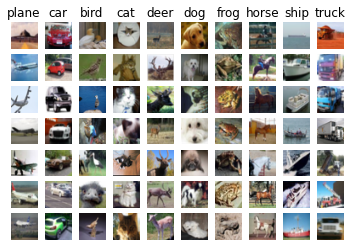

In [5]:
#Take a quick look at what we downloaded, and pickle it for our later / easier use.
#(Note - Pickles are a way to save Python variables so you can pass them between scripts).
#Note for this to work you will need numpy installed in your environment!
#If this is your first time running this code, you will need to run the block
#above to make sure you have the dependencies for this lab!
#This code should output an image with examples of each class.

import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

#Example implementation of lab question starts here
cifar10_dir = 'cifar-10-batches-py'

xs = []
ys = []
for b in range(1,6):
    d = os.path.join(cifar10_dir, 'data_batch_%d' % (b, ))
    
    with open(d, 'rb') as f:
        datadict = pickle.load(f, encoding='latin1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        y = np.array(Y)
    
    
    xs.append(X)
    ys.append(y)
    
X_train = np.concatenate(xs)
y_train = np.concatenate(ys)


with open(os.path.join(cifar10_dir, "test_batch"), 'rb') as f:
    datadict = pickle.load(f, encoding='latin1')
    X = datadict['data']
    Y = datadict['labels']
    X_test = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    y_test = np.array(Y)


#Save as a Pickle we can use later, so we don't have to repeat the above loading code again.
#We could also write the above as a function for loading if we wanted.
#Also using a dict to make things a little easier to read - you could easily use a list.
with open('testTrainLab1.pickle', 'wb') as f:
    labData = {}
    labData["X_train"] = X_train
    labData["y_train"] = y_train
    labData["X_test"] = X_test
    labData["y_test"] = y_test
    pickle.dump(labData, f)
#Example implementation of lab question ends here

#Visualize
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()